In [ ]:
import pandas as pd
import os
import random
import numpy as np
from google.colab import drive
drive.mount('/content/drive')  # Autenticazione con Google Drive


Mounted at /content/drive


# caricamento delle metriche precalcolate

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/blockchain/analisi/GRAFO/wallet_network_metrics_networkit.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025738 entries, 0 to 1025737
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Node         1025738 non-null  object 
 1   Degree       1025738 non-null  float64
 2   PageRank     1025738 non-null  float64
 3   Eigenvector  1025738 non-null  float64
dtypes: float64(3), object(1)
memory usage: 31.3+ MB


In [ ]:
df.head()

,Node,Degree,PageRank,Eigenvector
0,1JhxKYjrrrF2w44A95CCawe5jL8DjtApqq,0.000004,1.009578e-06,3.623532e-09
1,1BhnbbHwRJnCRk2QxVvXiGTXN5p4vbm2rG,0.000014,2.089760e-06,4.190134e-11
2,19yMdFUzxdHH7qp3Hb1kgmRELgd5aYNoCY,0.000003,4.980502e-07,8.335091e-10
3,19pR2qXmy37hhXuXahWWYjRfdrL9V9aqJh,0.000005,1.186474e-06,1.491325e-13
4,3F1necVPW5M4LSaEmwqwn3ecdWipXBuCEk,0.000008,5.023203e-07,3.811044e-07


In [ ]:
path = "/content/drive/MyDrive/blockchain/E++/"
wallets_classes = pd.read_csv(path + "wallets_features_classes_combined.csv")

In [ ]:
wallets_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268260 entries, 0 to 1268259
Data columns (total 58 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   address                        1268260 non-null  object 
 1   Time step                      1268260 non-null  int64  
 2   class                          1268260 non-null  int64  
 3   num_txs_as_sender              1268260 non-null  float64
 4   num_txs_as receiver            1268260 non-null  float64
 5   first_block_appeared_in        1268260 non-null  float64
 6   last_block_appeared_in         1268260 non-null  float64
 7   lifetime_in_blocks             1268260 non-null  float64
 8   total_txs                      1268260 non-null  float64
 9   first_sent_block               1268260 non-null  float64
 10  first_received_block           1268260 non-null  float64
 11  num_timesteps_appeared_in      1268260 non-null  float64
 12  btc_transacted

In [ ]:
wallets_classes.head()

,address,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,25,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,25,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
2,1111DAYXhoxZx2tsRnzimfozo783x1yC2,29,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
3,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
4,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0


In [ ]:
# Rinomina la colonna 'address' in 'node' in wallets_classes
wallets_classes.rename(columns={'address': 'Node'}, inplace=True)

# Esegue il merge tra df e wallets_classes sulla colonna 'node'
merged_df = pd.merge(df, wallets_classes, on='Node', how='inner')

# Visualizza il DataFrame risultante
merged_df.head()

,Node,Degree,PageRank,Eigenvector,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,1JhxKYjrrrF2w44A95CCawe5jL8DjtApqq,0.000004,1.009578e-06,3.623532e-09,25,1,1.0,1.0,439588.0,439589.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0
1,1JhxKYjrrrF2w44A95CCawe5jL8DjtApqq,0.000004,1.009578e-06,3.623532e-09,25,1,1.0,1.0,439588.0,439589.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0
2,1BhnbbHwRJnCRk2QxVvXiGTXN5p4vbm2rG,0.000014,2.089760e-06,4.190134e-11,33,3,1.0,1.0,455718.0,455719.0,...,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,1.0
3,1BhnbbHwRJnCRk2QxVvXiGTXN5p4vbm2rG,0.000014,2.089760e-06,4.190134e-11,33,3,1.0,1.0,455718.0,455719.0,...,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,1.0
4,19yMdFUzxdHH7qp3Hb1kgmRELgd5aYNoCY,0.000003,4.980502e-07,8.335091e-10,36,2,1.0,0.0,461761.0,461761.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0


In [ ]:
sorted_df = merged_df.sort_values(by=['PageRank'], ascending=False)  # Ordina in modo decrescente
result_df = sorted_df[['PageRank', 'class']]  # Seleziona solo le colonne desiderate
result_df.head() # mostra le prime 5 righe

,PageRank,class
1053430,0.003159,2
1053432,0.003159,2
1053433,0.003159,2
1053435,0.003159,2
1053436,0.003159,2


In [ ]:
# Ordina il DataFrame per Degree in modo decrescente e resetta l'indice
sorted_df = merged_df.sort_values(by=['PageRank'], ascending=False).reset_index(drop=True)

# Filtra il DataFrame per la classe 1
filtered_df = sorted_df[sorted_df['class'] == 1]

# Seleziona le colonne Degree e class dal DataFrame filtrato
result_df = filtered_df[['PageRank', 'class']]

# Visualizza il DataFrame risultante
result_df.head()

,PageRank,class
17288,0.000266,1
17289,0.000266,1
17290,0.000266,1
17291,0.000266,1
17292,0.000266,1


# visusalizzazione per classe delle distribuzione delle metriche


In [ ]:
df1 = merged_df.copy()

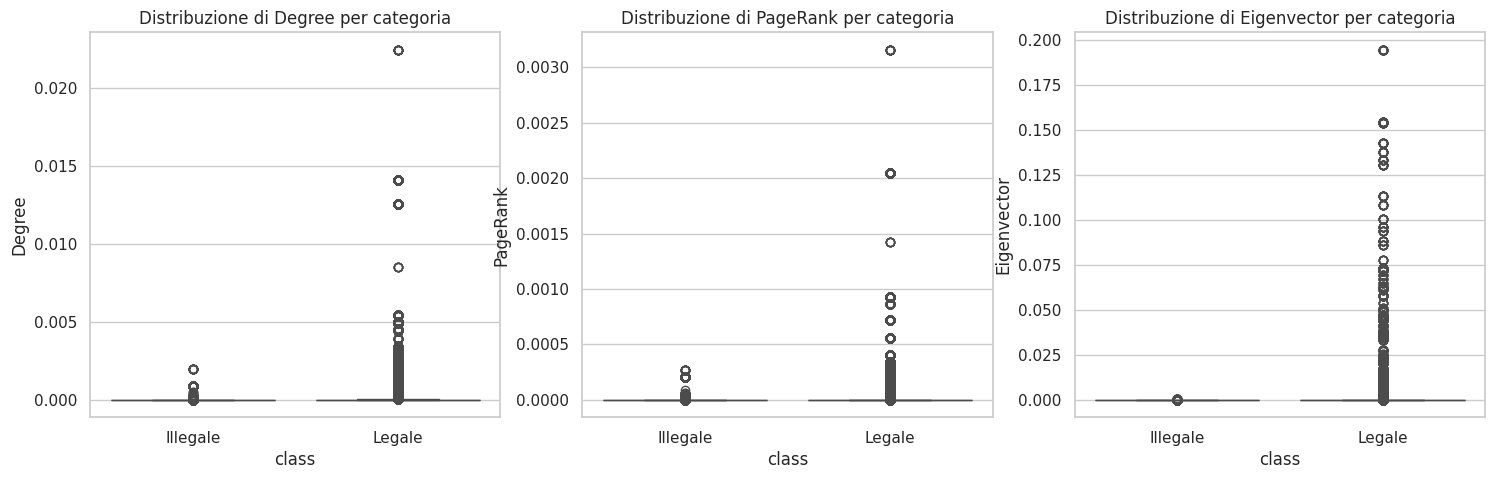

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mappa la colonna "class" (assumendo che 1 = legale, 2 = illegale)
df1["class"] = df1["class"].map({2: "Legale", 1: "Illegale"})

# Imposta lo stile
sns.set(style="whitegrid")

# Plotta la distribuzione delle metriche per class
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ["Degree", "PageRank", "Eigenvector"]
for i, metric in enumerate(metrics):
    sns.boxplot(data=df1, x="class", y=metric, ax=axes[i])
    axes[i].set_title(f"Distribuzione di {metric} per categoria")

plt.show()


# ricerca di pattern

In [ ]:
df2 = merged_df.copy()

##  correlazione Spearman tra le metriche di centralità e la classe

In [ ]:
import scipy.stats as stats

# Calcoliamo la correlazione Spearman tra le metriche di centralità e la classe
corr_results = {}
for metric in ["Degree", "PageRank", "Eigenvector"]:
    corr, p_value = stats.spearmanr(df2[metric], df2["class"])
    corr_results[metric] = {"Spearman Corr": corr, "P-value": p_value}

# Convertiamo i risultati in DataFrame
corr_df = pd.DataFrame.from_dict(corr_results, orient="index")

print(corr_df)


             Spearman Corr  P-value
Degree           -0.054738      0.0
PageRank          0.126205      0.0
Eigenvector      -0.252540      0.0


## rapporto tra transazioni in entrata ed in uscita

I wallet illegali tendono ad inviare più transazioni rispetto a quelle ricevute?


Ci sono wallet che ricevono molte transazioni ma ne inviano poche? Potrebbero essere indirizzi di accumulo


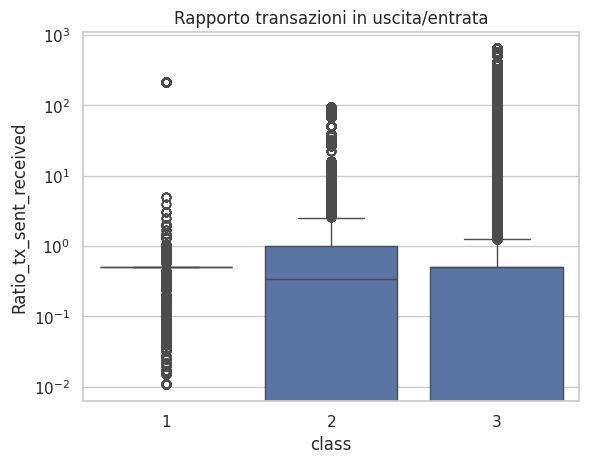

In [ ]:
df2["Ratio_tx_sent_received"] = df2["num_txs_as_sender"] / (df2["num_txs_as receiver"] + 1)

sns.boxplot(data=df2, x="class", y="Ratio_tx_sent_received")
plt.title("Rapporto transazioni in uscita/entrata")
plt.yscale("log")
plt.show()


In [ ]:
df2["Centrality_Type"] = df2.apply(
    lambda row: "Alto PageRank" if row["PageRank"] > row["Eigenvector"]
    else "Alto Eigenvector" if row["Eigenvector"] > row["PageRank"]
    else "Bilanciato", axis=1
)

# Conta quanti nodi illegali appartengono a ogni categoria
print(df2.groupby(["Centrality_Type", "class"]).size())


Centrality_Type   class
Alto Eigenvector  1           261
                  2        141038
                  3        159042
Alto PageRank     1         28340
                  2        197833
                  3        741739
dtype: int64


## vita media dei wallet

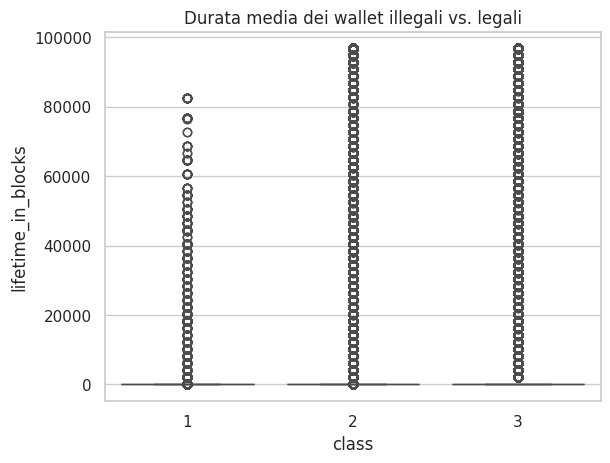

In [ ]:
# Analizziamo la vita media dei wallet
sns.boxplot(x="class", y="lifetime_in_blocks", data=df2)
plt.title("Durata media dei wallet illegali vs. legali")
plt.show()


## relazione tra pagerank e btc transati

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


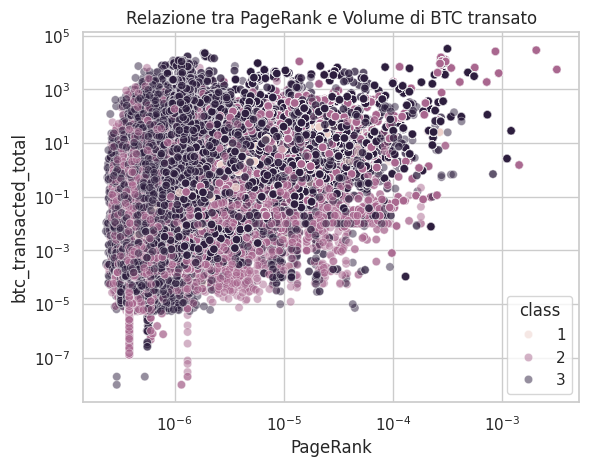

In [ ]:
# Creiamo una scatter plot tra PageRank e BTC transati
sns.scatterplot(x="PageRank", y="btc_transacted_total", hue="class", data=df2, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Relazione tra PageRank e Volume di BTC transato")
plt.show()


nodi con page rank alto transano tanti btc, ma le attività anomale sono perfettamente camuffate

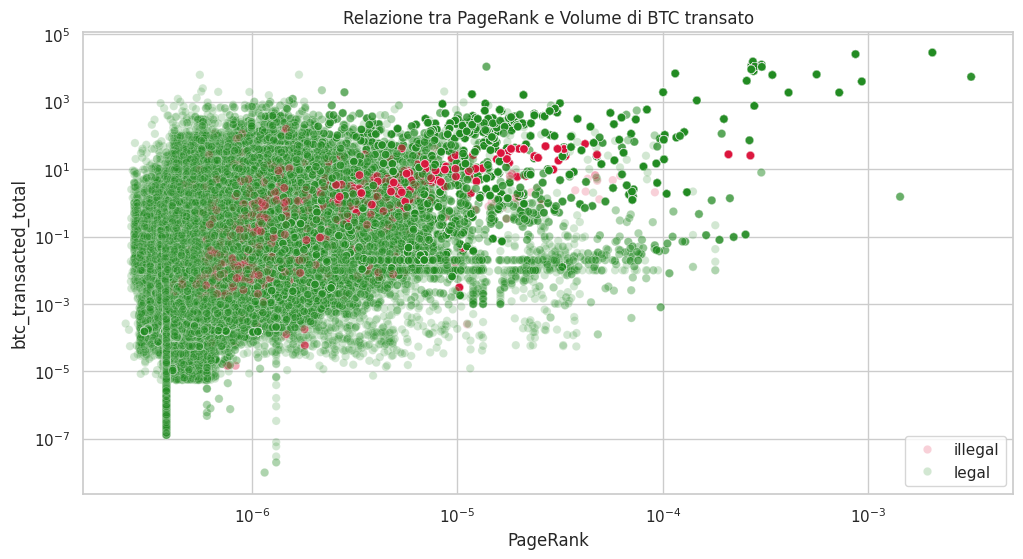

In [ ]:
df3 = df2[df2['class']!=3]
# Creiamo una scatter plot tra PageRank e BTC transati
plt.figure(figsize=(12, 6))

sns.scatterplot(x="PageRank", y="btc_transacted_total", hue="class", data=df3, alpha=0.2, palette={1: "crimson", 2: "forestgreen"})
plt.xscale("log")
plt.yscale("log")
plt.title("Relazione tra PageRank e Volume di BTC transato")

# Posiziona la legenda in basso a destra con nomi personalizzati
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['illegal', 'legal'], loc='lower right')


plt.show()

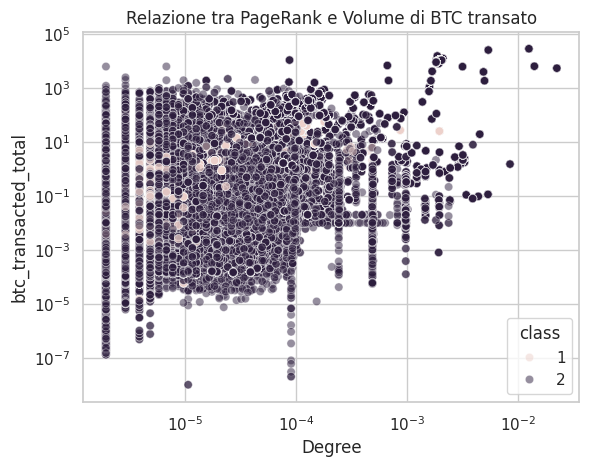

In [ ]:
# Creiamo una scatter plot tra PageRank e BTC transati
sns.scatterplot(x="Degree", y="btc_transacted_total", hue="class", data=df3, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Relazione tra PageRank e Volume di BTC transato")
plt.show()

##Identificazione di Exchange Fantasma (Shadow Banking)


Alcuni wallet illegali simulano exchange per convertire criptovalute senza licenza.
Caratteristiche: Molte transazioni in ingresso e uscita, Grandi volumi di BTC transati, Distribuzione del denaro tra molteplici altri wallet

In [ ]:
# Troviamo wallet con grande volume transato e molte connessioni
shadow_exchanges = df2[
    (df2["btc_transacted_total"] > df2["btc_transacted_total"].quantile(0.99)) &
    (df2["num_txs_as_sender"] > df2["num_txs_as_sender"].quantile(0.95)) &
    (df2["num_txs_as receiver"] > df2["num_txs_as receiver"].quantile(0.95))
]

print(shadow_exchanges[["Node", "btc_transacted_total", "num_txs_as_sender", "num_txs_as receiver", "class"]])


                                       Node  btc_transacted_total  \
9134     1N52wHoVR79PMDishab2XmRHsbekCdGquK           6466.177819   
9135     1N52wHoVR79PMDishab2XmRHsbekCdGquK           6466.177819   
9136     1N52wHoVR79PMDishab2XmRHsbekCdGquK           6466.177819   
9137     1N52wHoVR79PMDishab2XmRHsbekCdGquK           6466.177819   
9138     1N52wHoVR79PMDishab2XmRHsbekCdGquK           6466.177819   
...                                     ...                   ...   
1249290  1KYXrw4Ftkmomfs4iyVXUSqQeRX75Unoi8           9144.530881   
1249291  1KYXrw4Ftkmomfs4iyVXUSqQeRX75Unoi8           9144.530881   
1249292  1KYXrw4Ftkmomfs4iyVXUSqQeRX75Unoi8           9144.530881   
1249293  1KYXrw4Ftkmomfs4iyVXUSqQeRX75Unoi8           9144.530881   
1249294  1KYXrw4Ftkmomfs4iyVXUSqQeRX75Unoi8           9144.530881   

         num_txs_as_sender  num_txs_as receiver  class  
9134                  67.0                141.0      2  
9135                  67.0                141.0      2  


In [ ]:
shadow_exchanges[shadow_exchanges['class']==1]

,Node,Degree,PageRank,Eigenvector,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median


##unisco le metriche ai nodi del grafo

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from multiprocessing import Pool

# Creazione del grafo per i wallet
# Creare il grafo misto indirizzi-transazioni
G_wallet = nx.Graph()

# Aggiungere i nodi dei wallet con etichetta "wallet"
for addr_id, features in merged_df.iterrows():
    G_wallet.add_node(addr_id, **features.to_dict(), node_type="wallet")

# Funzione per aggiungere archi in batch con `chunksize`
def add_edges_from_file(graph, filename, col1, col2, chunksize=100000):
    for chunk in pd.read_csv(filename, usecols=[col1, col2], chunksize=chunksize):
        graph.add_edges_from(chunk.itertuples(index=False, name=None))

# Aggiungere gli archi tra indirizzi (wallet-wallet)
add_edges_from_file(G_wallet, path + "AddrAddr_edgelist.csv", "input_address", "output_address")

# Aggiungere gli archi tra indirizzi e transazioni (wallet-tx)
add_edges_from_file(G_wallet, path + "AddrTx_edgelist.csv", "input_address", "txId")
add_edges_from_file(G_wallet, path + "TxAddr_edgelist.csv", "txId", "output_address")

# Etichettare i nodi delle transazioni come "transaction"
for node in G_wallet.nodes:
    if G_wallet.degree[node] > 1 and "node_type" not in G_wallet.nodes[node]:
        G_wallet.nodes[node]["node_type"] = "transaction"

# Analisi Strutturale del Grafo dei Wallet
num_nodi_wallet = G_wallet.number_of_nodes()
num_archi_wallet = G_wallet.number_of_edges()
densita_wallet = nx.density(G_wallet)
componenti_connesse_wallet = nx.number_connected_components(G_wallet)

print(f"🔹 Numero di nodi (wallet): {num_nodi_wallet}")
print(f"🔹 Numero di archi (relazioni): {num_archi_wallet}")
print(f"🔹 Densità del grafo (wallet): {densita_wallet:.6f}")
print(f"🔹 Numero di componenti connesse: {componenti_connesse_wallet}")

🔹 Numero di nodi (wallet): 2293535
🔹 Numero di archi (relazioni): 4049441
🔹 Densità del grafo (wallet): 0.000002
🔹 Numero di componenti connesse: 1267791


##Identificazione di Schemi di Transazione Ripetuti
Alcuni wallet usano pattern prevedibili per nascondere operazioni illecite.
Caratteristiche: Transazioni cicliche (lo stesso BTC torna indietro), Alta Similarità nei Timestamp delle Transazioni, Stessi indirizzi di input e output ripetuti nel tempo


transazioni cicliche tra stessi indirizzi, potrebbero essere schemi di riciclaggio.



In [ ]:
# Estraiamo i nodi di tipo "transaction"
tx_nodes = [node for node, attr in G_wallet.nodes(data=True) if attr.get("node_type") == "transaction"]

# Creiamo una lista di transazioni con gli indirizzi coinvolti
tx_patterns = []
for tx in tx_nodes:
    neighbors = list(G_wallet.neighbors(tx))  # Wallet collegati alla transazione
    # Convert all neighbor nodes to strings before sorting
    neighbors = [str(neighbor) for neighbor in neighbors]
    tx_patterns.append(tuple(sorted(neighbors)))  # Creiamo un pattern ordinato

# Identifichiamo transazioni ripetute
from collections import Counter
pattern_counts = Counter(tx_patterns)

# Stampiamo i pattern più comuni
print(f"🔹 Pattern di transazioni più ripetuti:")
for pattern, count in pattern_counts.most_common(5):
    print(f"{pattern} → {count} volte")

🔹 Pattern di transazioni più ripetuti:
('1GX28yLjVWux7ws4UQ9FB4MnLH4UKTPK2z', '89273') → 7522 volte
('1GX28yLjVWux7ws4UQ9FB4MnLH4UKTPK2z', '7952') → 2705 volte
('3GmjTdhoMaCrPUTMEgzbFYkVt4B5JMYL6w', '9009788') → 2062 volte
('193173', '3GmjTdhoMaCrPUTMEgzbFYkVt4B5JMYL6w') → 1845 volte
('143705', '16krTPWeAgszUHTByHEi6kGikGQo8MacRJ') → 1833 volte


## ricerca di nodi illegali direttamente connessi o connessi a meno di una unità

In [ ]:
# Estrarre i nodi illegali
illegal_nodes = {node for node, attr in G_wallet.nodes(data=True) if attr.get("class") == 1}

# Creare il sottografo solo con nodi illegali
G_illegal = G_wallet.subgraph(illegal_nodes).copy()

# Analizziamo il sottografo
print(f"🔹 Nodi illegali nel sottografo: {G_illegal.number_of_nodes()}")
print(f"🔹 Archi tra nodi illegali: {G_illegal.number_of_edges()}")
print(f"🔹 Componenti connesse: {nx.number_connected_components(G_illegal)}")


🔹 Nodi illegali nel sottografo: 28601
🔹 Archi tra nodi illegali: 0
🔹 Componenti connesse: 28601


In [ ]:
from itertools import combinations

# Lista dei nodi illegali
illegal_nodes = {node for node, attr in G_wallet.nodes(data=True) if attr.get("class") == 1}

# Dizionario per contare i nodi intermedi
connections_via_one = {}

# Verifichiamo per ogni coppia di nodi illegali
for node1, node2 in combinations(illegal_nodes, 2):
    neighbors1 = set(G_wallet.neighbors(node1))
    neighbors2 = set(G_wallet.neighbors(node2))

    # Troviamo i nodi in comune tra i due
    common_neighbors = neighbors1 & neighbors2

    if common_neighbors:
        connections_via_one[(node1, node2)] = common_neighbors

# Stampiamo alcune connessioni trovate
print("🔹 Coppie di nodi illegali connessi tramite un nodo intermedio:")
for (n1, n2), intermediaries in list(connections_via_one.items())[:5]:  # Stampiamo solo i primi 5
    print(f"{n1} ↔ {n2} tramite {intermediaries}")


🔹 Coppie di nodi illegali connessi tramite un nodo intermedio:
632833 ↔ 632834 tramite {'3FzoBDgUcGgKWvQ8orC4Hjdp45LqDdkm4g'}


In [ ]:
print(connections_via_one)

{(632833, 632834): {'3FzoBDgUcGgKWvQ8orC4Hjdp45LqDdkm4g'}}
